[![G-Node GIN](https://gin.g-node.org/img/favicon.png)](https://gin.g-node.org/hiobeen/Mouse_hdEEG_ASSR_Hwang_et_al/)
**👈🏼 Click to open in G-Node GIN repository!**

</br>

</br>

# 1. Dataset information

A set of high-density EEG (electroencephalogram) recording obtained from awake, freely-moving mice (*mus musculus*) (n = 6). Details of experimental method are described in the original research article using the same dataset [Hwang et al., 2019, *Brain Structure and Function*].

* Title: High-density EEG recording in mice for auditory steady-state response with optogenetic stimulation in the basal forebrain
* Authors: Eunjin Hwang, Hio-Been Han, Jeongyeong Kim, & Jee Hyun Choi [corresponding: jeechoi@kist.re.kr]
* Version: 1.0.0
* Related publication: [Hwang et al., 2019, *Brain Structure and Function*](https://link.springer.com/article/10.1007/s00429-019-01845-5).
* Dataset repository: G-Node GIN (DOI will be provided soon) https://gin.g-node.org/hiobeen/Mouse_hdEEG_ASSR_Hwang_et_al/

**Step-by-step tutorial is included, fully functioning with _Google Colaboratory_ environment.**
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/Hio-Been/83b7e5d0e7c7e506d95834c9f2fc3418/data_description_gin-mouse_hdeeg_assr_hwang_et_al.ipynb)



# 2. File organization

Raw EEG data are saved in EEGLAB dataset format (*.set). Below are the list of files included in this dataset.

**a) Meta data file (1 csv file)**

    [metadata.csv]
    
**b) Electrode montage file (1 csv file)**

    [montage.csv]
    
**c) EEG data files (6 set files, 6 fdt files)**

    [rawdata/epochs_animal1.set, rawdata/epochs_animal1.fdt]
    [rawdata/epochs_animal2.set, rawdata/epochs_animal2.fdt]
    [rawdata/epochs_animal3.set, rawdata/epochs_animal3.fdt]
    [rawdata/epochs_animal4.set, rawdata/epochs_animal4.fdt]
    [rawdata/epochs_animal5.set, rawdata/epochs_animal5.fdt]
    [rawdata/epochs_animal6.set, rawdata/epochs_animal6.fdt]
    
**d) Example python scripts**

    [Data_Description_gin-Mouse_hdEEG_ASSR_Hwang_et_al.ipynb]
     * written and tested on Google COLAB - Python 3 environment
    

# 3. How to get started (Python 3 without _gin_)
As the data are saved in EEGLAB format, you need to install appropriate module to access the data in Python3 environment. The fastest way would be to use <code>read_epochs_eeglab()</code> function in *MNE-python* module. You can download the toolbox from the link below (or use <code>pip install mne</code> in terminal shell).


*[MNE-python]* https://martinos.org/mne/stable/index.html

## Part 1. Accessing dataset

### 1-1. Download dataset and MNE-python module

The dataset has been uploaded on G-Node and can be accessed by git command, by typing <code>git clone https://gin.g-node.org/hiobeen/Mouse_hdEEG_ASSR_Hwang_et_al</code>. However, it's currently not functioning because of the large size of each dataset (>100 MB). Instead, you can use <code>gin</code> command or custom function written below to copy dataset into your work environment. Also, you need to install *MNE-Python* module using *pip* command to load EEGLAB-formatted EEG data.

> Warning: Direct cloning using *git clone git@gin.g-node.org:/hiobeen/Mouse_hdEEG_ASSR_Hwang_et_al.git* may not work because of the large size of each dataset (>100 MB).

To download dataset and install MNE-python module into your environment (local machine/COLAB), try running scripts below.

> Note: Through this step-by-step demonstration, we will use data from one animal (#Animal 2). Unnecessary data files will not be downloaded to prevent long download time. To download whole dataset, change this part; <code>dataset_to_download = [2]</code> into <code>dataset_to_download = [1,2,3,4,5,6]</code>.



In [0]:
# Demo 1-1. Setting an enviroment
dir_origin = '/content/' # <- Change this in local machine
dir_dataset= 'dataset/'

#!rm -rf /content/dataset/
import requests
from os import listdir, mkdir, path, system
def download_dataset( dataset_to_download = range(1,7), dir_dataset = dir_dataset ): 
  # Check directory
  if not path.isdir('%s%s'%(dir_origin,dir_dataset)):
    mkdir('%s%s'%(dir_origin,dir_dataset))
    mkdir('%s%s/rawdata/'%(dir_origin,dir_dataset))
  
  # File names to be downloaded
  file_ids = [ 'meta.csv', 'montage.csv' ]
  for set_id in dataset_to_download:
    file_ids.append( 'rawdata/epochs_animal%s.set'%set_id )
    file_ids.append( 'rawdata/epochs_animal%s.fdt'%set_id )

  # Request & download
  repo_url = 'https://gin.g-node.org/hiobeen/Mouse_hdEEG_ASSR_Hwang_et_al/raw/9a35f6b1a53f87a96d76b8b7912738cb7d8d3d36/'
  for file_id in file_ids:
    fname_dest = "%s%s%s"%(dir_origin, dir_dataset, file_id)
    if path.isfile(fname_dest) is False:
      print('...copying to [%s]...'%fname_dest)
      file_url = '%s%s'%(repo_url, file_id)
      r = requests.get(file_url, stream = True)  
      with open(fname_dest, "wb") as file:  
          for block in r.iter_content(chunk_size=1024):
              if block: file.write(block)
    else:
      print('...skipping already existing file [%s]...'%fname_dest)

# Initiate downloading
print('\n============= Start Downloading =================\n')
dataset_to_download = [2] # Partial download to prevent long download time
#dataset_to_download = [1,2,3,4,5,6] # Download of whole dataset
download_dataset(dataset_to_download)
print('\n============= Download finished ==================\n\n')

# List up 'dataset/' directory
print('\n==== List of available files in google drive ====\n')
print(listdir('%sdataset/'%dir_origin))
print('\n============= End of the list ==================\n\n')

# List up dataset/rawdata/*.set and ~/*.fdt files
print('\n==== List of available files in google drive ====\n')
print(listdir('%sdataset/rawdata/'%dir_origin))
print('\n============= End of the list ==================\n\n')

# Install mne-python module
system('pip install mne');


============= Start Downloading =================

...copying to [/content/dataset/meta.csv]...
...copying to [/content/dataset/montage.csv]...
...copying to [/content/dataset/rawdata/epochs_animal2.set]...
...copying to [/content/dataset/rawdata/epochs_animal2.fdt]...

============= Download finished ==================



==== List of available files in google drive ====

['meta.csv', 'montage.csv', 'rawdata']

============= End of the list ==================



==== List of available files in google drive ====

['epochs_animal2.set', 'epochs_animal2.fdt']

============= End of the list ==================




###1-2. Accessing meta-data table

File *meta.csv* contains the demographic information of 6 mice. Using <code>read_csv()</code> of *pandas* module, meta-datat able can be visualized as follow. 




In [0]:
## Demo 1-2. Display meta-data file
from pandas import read_csv
meta = read_csv('%s%smeta.csv'%(dir_origin, dir_dataset));
meta

subject_name           file_name  n_trials  age_in_month     sex
0      animal1  epochs_animal1.set       589             4    Male
1      animal2  epochs_animal2.set       557             4    Male
2      animal3  epochs_animal3.set       349             4    Male
3      animal4  epochs_animal4.set       493             4  Female
4      animal5  epochs_animal5.set       956             5    Male
5      animal6  epochs_animal6.set       959             4    Male

### 1-3. Data loading and dimensionality check

Each _*.fdt_ file is consisted of different number of trials. To load dataset, a function <code>get_eeg_data()</code> is defined below. To maintain original dimensionality order (cf. channel-time-trial in EEGLAB of Matlab), <code>np.moveaxis()</code> was applied. 


In [0]:
# Demo 1-3. Data loading and dimensionality check
from mne.io import read_epochs_eeglab as loadeeg
import numpy as np
def get_eeg_data(dataset_idx, CAL=1e-6):
  f_name = '%s%srawdata/%s'%(dir_origin,dir_dataset,meta.file_name[dataset_idx])
  EEG = loadeeg(f_name, verbose=False)
  EEG.data = np.moveaxis( EEG.get_data(), 0, 2 ) / CAL
  return EEG, f_name

# Data loading
EEG, f_name = get_eeg_data( dataset_idx = 1 ) # idx = from 0 to 5 (1st to 6th)

# Dimension check
print('File name  :  [%s]'%f_name)
print('File contains [%d channels, %4d time points, %3d trials]'%(EEG.data.shape))

File name  :  [/content/dataset/rawdata/epochs_animal2.set]
File contains [38 channels, 5200 time points, 557 trials]


Note that voltage calibration value (*CAL*) is set to 1e-6 in 0.11.0 version of [eeglab.py](https://github.com/mne-tools/mne-python/blob/master/mne/io/eeglab/eeglab.py])


### 1-4. Getting channel coordinates

The EEG data are recorded with 38 electrode array, and two of the electrodes were used as ground and reference site - total 36 channel data are available. Coordinates of each electrode are in the file [data/montage.csv], and can be accessed and visualized by following script.


In [0]:
# Demo 1-4. Import montage matrix
from matplotlib import pyplot as plt; plt.style.use('ggplot')
from pandas import read_csv
montage_table = read_csv('%s%smontage.csv'%(dir_origin, dir_dataset))
elec_montage = np.array(montage_table)[:, 1:3]

# Open figure handle
plt.figure(figsize=(6,6))

# Plot EEG channels position (total 36 channels)
plt.plot( elec_montage[:36,0], elec_montage[:36,1], 'go' )
for chanIdx in range(36):
  plt.text( elec_montage[chanIdx,0], elec_montage[chanIdx,1]+.2,
           EEG.info['ch_names'][chanIdx][5:], ha='center', fontsize=10 )

# Plot Ref/Gnd electrode position
plt.plot( elec_montage[36:,0], elec_montage[36:,1], 'rs' )
plt.text(0, 0.0, 'BP', fontsize=12, weight='bold', ha='center',va='center');
plt.text(0,-4.2, 'LP', fontsize=12, weight='bold', ha='center',va='center');

plt.xlabel('ML coordinate (mm)'); plt.ylabel('AP coordinate (mm)');
plt.title('2D electrode montage');
plt.legend(['Active','Ref/Gnd'], loc='upper right');
plt.gca().set_facecolor((1,1,1))
plt.grid(False); plt.axis([-6, 6, -7, 5.5])

# Draw head boundary
def get_boundary():
 return np.array([
    -4.400, 0.030, -4.180, 0.609, -3.960, 1.148, -3.740, 1.646, -3.520, 2.105, -3.300, 2.525, -3.080, 2.908, -2.860, 3.255,
    -2.640, 3.566, -2.420, 3.843, -2.200, 4.086, -1.980, 4.298, -1.760, 4.4799, -1.540, 4.6321, -1.320, 4.7567, -1.100, 4.8553,
    -0.880, 4.9298, -0.660, 4.9822, -0.440, 5.0150, -0.220, 5.0312,0, 5.035, 0.220, 5.0312, 0.440, 5.0150, 0.660, 4.9822,
    0.880, 4.9298, 1.100, 4.8553, 1.320, 4.7567, 1.540, 4.6321,1.760, 4.4799, 1.980, 4.2986, 2.200, 4.0867, 2.420, 3.8430,
    2.640, 3.5662, 2.860, 3.2551, 3.080, 2.9087, 3.300, 2.5258,3.520, 2.1054, 3.740, 1.6466, 3.960, 1.1484, 4.180, 0.6099,
    4.400, 0.0302, 4.400, 0.0302, 4.467, -0.1597, 4.5268, -0.3497,4.5799, -0.5397, 4.6266, -0.7297, 4.6673, -0.9197, 4.7025, -1.1097,
    4.7326, -1.2997, 4.7579, -1.4897, 4.7789, -1.6797, 4.7960, -1.8697,4.8095, -2.0597, 4.8199, -2.2497, 4.8277, -2.4397, 4.8331, -2.6297,
    4.8366, -2.8197, 4.8387, -3.0097, 4.8396, -3.1997, 4.8399, -3.3897,4.8384, -3.5797, 4.8177, -3.7697, 4.7776, -3.9597, 4.7237, -4.1497,
    4.6620, -4.3397, 4.5958, -4.5297, 4.5021, -4.7197, 4.400, -4.8937,4.1800, -5.1191, 3.9600, -5.3285, 3.7400, -5.5223, 3.5200, -5.7007,
    3.3000, -5.8642, 3.0800, -6.0131, 2.8600, -6.1478, 2.6400, -6.2688,2.4200, -6.3764, 2.2000, -6.4712, 1.9800, -6.5536, 1.7600, -6.6241,
    1.5400, -6.6833, 1.3200, -6.7317, 1.1000, -6.7701, 0.8800, -6.7991,0.6600, -6.8194, 0.4400, -6.8322, 0.2200, -6.8385, 0, -6.840,
    -0.220, -6.8385, -0.440, -6.8322, -0.660, -6.8194, -0.880, -6.7991,-1.100, -6.7701, -1.320, -6.7317, -1.540, -6.6833, -1.760, -6.6241,
    -1.980, -6.5536, -2.200, -6.4712, -2.420, -6.3764, -2.640, -6.2688,-2.860, -6.1478, -3.080, -6.0131, -3.300, -5.8642, -3.520, -5.7007,
    -3.740, -5.5223, -3.960, -5.3285, -4.180, -5.1191, -4.400, -4.89370,-4.5021, -4.7197, -4.5958, -4.5297, -4.6620, -4.3397, -4.7237, -4.1497,
    -4.7776, -3.9597, -4.8177, -3.7697, -4.8384, -3.5797, -4.8399, -3.3897,-4.8397, -3.1997, -4.8387, -3.0097, -4.8367, -2.8197, -4.8331, -2.6297,
    -4.8277, -2.4397, -4.8200, -2.2497, -4.8095, -2.0597, -4.7960, -1.8697,-4.7789, -1.6797, -4.7579, -1.4897, -4.7326, -1.2997, -4.7025, -1.1097,
    -4.6673, -0.9197, -4.6266, -0.7297, -4.5799, -0.5397, -4.5268, -0.3497,-4.4670, -0.1597, -4.4000, 0.03025]).reshape(-1, 2)
boundary = get_boundary()
for p in range(len(boundary)-1): plt.plot(boundary[p:p+2,0],boundary[p:p+2,1], 'k-')

## Part 2. Plotting Event-Related Potentials

### 2-1. Accessing event info

Event information is saved in struct-type variable EEG.event and you can access it by typing <code>EEG.event</code>. Also, their time trace are avilable in 37-th and 38-th channel of <code>EEG.data</code>. For demonstration purpose, light and sound stimuli of 7 different types of event can be extracted and drawn as follow.

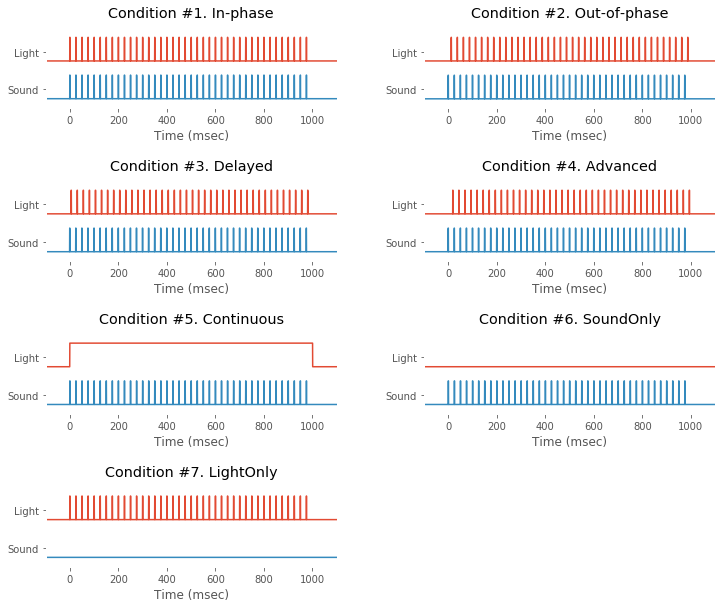

In [0]:
# Demo 2-1. Event profile (sound/light stimuli)
condNames = ['In-phase','Out-of-phase','Delayed','Advanced',
             'Continuous','SoundOnly', 'LightOnly'];

plt.figure(figsize=(12,10))
yshift = .8;
for condition in range(1,len(condNames)+1):
  plt.subplot(4,2,condition)
  trialIdx = np.where(EEG.events[:,2]==condition)[0]

  # Light stim
  light = EEG.data[-2,:,trialIdx[0]] + yshift
  plt.plot( EEG.times*1000, light)
  
  # Sound stim
  sound = EEG.data[-1,:,trialIdx[0]] - yshift 
  plt.plot( EEG.times*1000, sound)
  
  plt.ylim([-1.5*yshift, 3*yshift])
  plt.xlim([-.10*1000, 1.10*1000])
  plt.xlabel('Time (msec)')
  plt.yticks( (yshift*-.5,yshift*1.5), labels=['Sound', 'Light'] )
  plt.title('Condition #%d. %s'%(condition,condNames[condition-1]))
  plt.gca().set_facecolor((1,1,1))
plt.subplots_adjust(wspace=.3, hspace=.8)

### 2-2. Visualizing example single-trial trace

If data is successfully loaded, now you're ready! For data visualization, an example function is provided below. 

The function <code>plot_multichan()</code> draws multi-channel time series data, by taking 1D time vector, <code>x</code>, and 2D data matrix, <code>y</code>.

In [0]:
# Demo 2-2a. Function for multi-channel plotting
def plot_multichan( x, y, spacing = 3000, figsize = (10,10), ch_names = EEG.ch_names ):
  # Set color theme
  color_template = np.array([[1,.09,.15],[1,.75,.28],[.4,.2,0],[.6,.7,.3],[.55,.55,.08]])
  color_space = np.tile( color_template, 
                      (int(np.ceil([ float(y.shape[0])/color_template.shape[0]])[0]), 1) )
  # Open figure and plot
  plt.figure(figsize=figsize)
  y_center = np.linspace( -spacing, spacing, y.shape[0] )
  for chanIdx in range(y.shape[0]):
    shift = y_center[chanIdx] + np.nanmean(y[chanIdx,:])
    plt.plot(x, y[chanIdx,:]-shift, color=color_space[chanIdx,], linewidth=1);
  plt.xlabel('Time (sec)')
  plt.ylim((-1.1*spacing,1.1*spacing))
  plt.yticks(y_center, ch_names[::-1]);
  plt.gca().set_facecolor((1,1,1))
  return y_center

Using <code>plot_multichan()</code> function, example single-trial EEG trace can be visualized as follow.

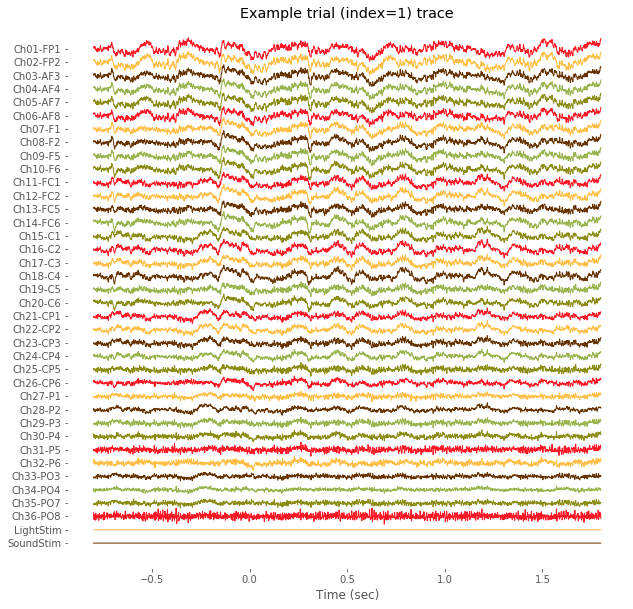

In [0]:
# Demo 2-2b. Visualization of raw EEG time trace
trial_index = 0
y_center = plot_multichan(EEG.times, EEG.data[:,:,trial_index])
plt.title('Example trial (index=%d) trace'%(1+trial_index));

Note that channels 1 to 36 contain actual EEG data from 36-channel electrode array (from FP1 to PO8), and channel 37 and 38 contain binary stimulus profile (0: no stimulation, 1: stimulation) of light and sound, respectively. 

###2-3. ERP in time domain

Using same function, <code>plot_multichan()</code>, ERP (Event-related potentials) trace can be drawn as follow.

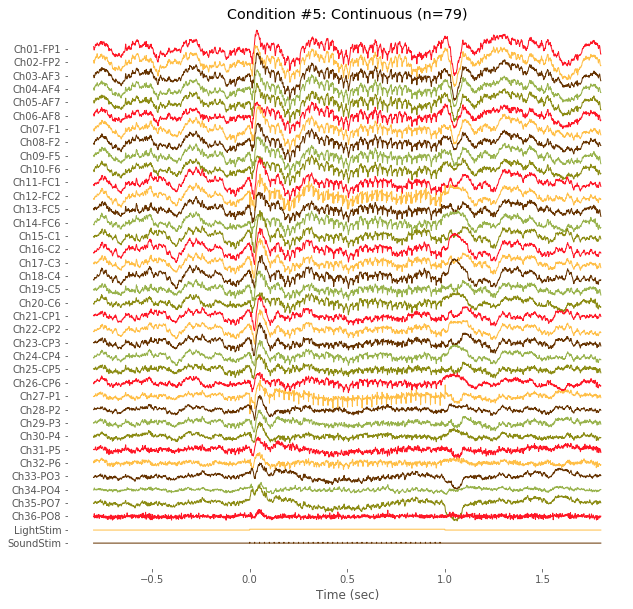

In [0]:
# Demo 2-3. Visualization of ERP time trace
condNames = ['In-phase', 'Out-of-phase', 'Delayed', 'Advanced',
             'Continuous','SoundOnly', 'LightOnly']
targetCondition = 5 # <- Try changing this
trialIdx = np.where((EEG.events[:,2])==targetCondition)[0]
erp = np.nanmean(EEG.data[:,:,trialIdx],2)
c = plot_multichan(EEG.times, erp, spacing = 300 )
plt.title('Condition #%d: %s (n=%d)'%(targetCondition, condNames[targetCondition-1],len(trialIdx)));

### 2-4. ERP in frequency domain

To calculate the amplitude of 40-Hz auditory steady-state response, fast Fourier transform can be applied as follow. 

In [0]:
# Demo 2-4. Time- and frequency-domain visualization of grand-averaged ERP
from numpy.fft import fft
def fft_half(x, Fs=2000): return fft(x)[:int(len(x)/2)]/len(x), np.linspace(0,Fs/2,len(x)/2)

# Get ERP in frequency domain
erp = np.nanmean(EEG.data[:,:,np.where((EEG.events[:,2])==2)[0]],2)
ac_erp = np.mean(erp[:36,],0)
ac_erp_fft,freq = fft_half(ac_erp)

# Plot time-domain signal
plt.figure(figsize=(14,8))
plt.subplot(2,1,1)
plt.plot( EEG.times, ac_erp, linewidth=.5 )
plt.xlim((-.8,1.8))
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (mV)')
plt.title('ERP signal in time domain')
plt.gca().set_facecolor((1,1,1))

# Plot frequency-domain signal
plt.subplot(2,1,2)
plt.plot( freq, np.abs(ac_erp_fft), linewidth=1 )
plt.xlim((0,80))
plt.xlabel('Freq (Hz)')
plt.ylabel('Amplitude (mV/Hz)')
plt.title('ERP signal in frequency domain')
plt.gca().set_facecolor((1,1,1))

plt.subplots_adjust(wspace=.3, hspace=.5)

### 2-5. ERP in time-frequency domain

Applying fast Fourier transform with moving temporal window, ERP signal can be drawn in time-frequency domain. To calculate spectrogram, a function <code>get_spectrogram()</code> is defined.


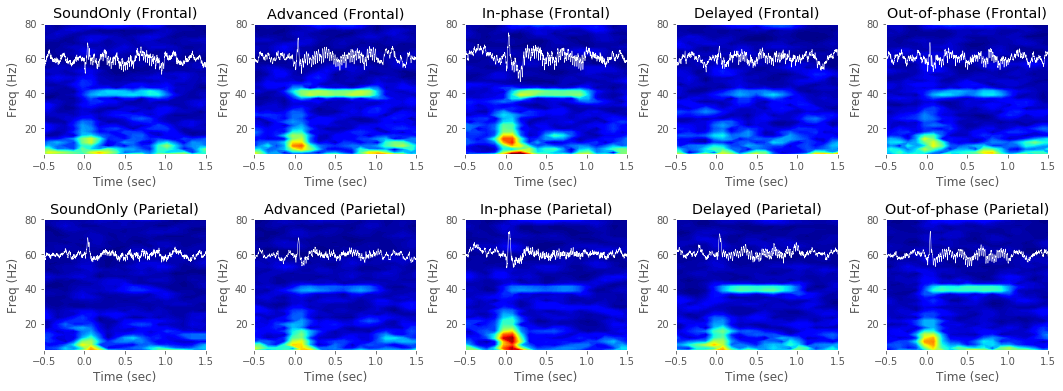

In [0]:
# Demo 2-5. Visualize frequency components in ERP
def get_spectrogram( data, t=EEG.times, Fs=2000, 
                    fft_win_size=2**10, t_resolution=0.1, freq_cut = 150): 
  
  # For many- and single-trials data compatibility
  if data.ndim < 3: data = np.expand_dims(data,2)
  t_fft = [t[0]+(((fft_win_size*.5)+1)/Fs),
           t[-1]-(((fft_win_size*.5)+1)/Fs)];
  t_vec = np.linspace( t_fft[0], t_fft[-1], (np.diff(t_fft)/t_resolution)+1);
  
  # Memory pre-occupation
  n_ch, _, n_trial = data.shape
  n_t = len(t_vec);
  _,f = fft_half( np.zeros(fft_win_size), Fs);
  n_f = np.where(f<100)[0][-1]+1;
  Spec = np.zeros( [n_t, n_f, n_ch, n_trial], dtype='float16');
  Spec_f = f[0:n_f];

  # Get sliding window indicies
  idx_collection = np.zeros((len(t_vec),2), dtype='int')
  for tIdx in range(len(t_vec)):
    idx_collection[tIdx,0] = int(np.where(t<t_vec[tIdx])[0][-1]-fft_win_size*.5)
    idx_collection[tIdx,1] = int(np.where(t<t_vec[tIdx])[0][-1]+fft_win_size*.5-1)
  short = np.where(~(np.diff(idx_collection,1)==fft_win_size-1 ))
  idx_collection[short,1] = idx_collection[short,1]+1
  Spec_t = t[np.array(np.mean(idx_collection,1), dtype='int')];

  # Calculation
  hann = np.hanning( fft_win_size-1 );
  for chanIdx in range(n_ch):
    for trialIdx in range(n_trial):
      epoch = data[chanIdx, :, trialIdx];
      for tIdx in range(len(t_vec)):
        d =  hann * epoch[idx_collection[tIdx,0]:idx_collection[tIdx,1]]
        [x,f]= fft_half(d, Fs);
        Spec[tIdx,:,chanIdx,trialIdx] = abs(x[:n_f]);
        
  return np.squeeze(Spec), Spec_t, Spec_f

# Calculation & Visualization
from matplotlib import cm
plt.figure(figsize=(18,6))
conditions = [6,4,1,3,2]
for targetCondition in conditions:
  trialIdx = np.where((EEG.events[:,2])==targetCondition)[0]

  # Calc Frontal Mean
  erp = np.mean(EEG.data[:,:,trialIdx],2)
  Spec, Spec_t, Spec_f = get_spectrogram(erp)
  frontal_Spec = np.mean(Spec[:,:,2:5],2)
  parietal_Spec = np.mean(Spec[:,:,20:24],2)
  
  frontal_erp = np.mean(erp[2:5,:],0)
  parietal_erp = np.mean(erp[20:24,:],0)
  
  # Frontal
  plt.subplot(2,len(conditions),np.where(np.array(conditions)==targetCondition)[0]+1)
  plt.contourf( Spec_t, Spec_f, frontal_Spec.transpose(),
               cmap=cm.jet, levels = np.linspace(0,1.8,100))
  plt.ylabel('Freq (Hz)')
  plt.xlabel('Time (sec)')
  plt.title('%s (Frontal)'%condNames[targetCondition-1])
  plt.plot(EEG.times, .5*frontal_erp+60, 'w-', linewidth=.5)
  plt.xlim([-.5,1.5])
  plt.ylim([5,80])

  # Parietal
  plt.subplot(2,len(conditions),len(conditions)+np.where(np.array(conditions)==targetCondition)[0]+1)
  plt.contourf( Spec_t, Spec_f, parietal_Spec.transpose(),
               cmap=cm.jet, levels = np.linspace(0,1.8,100))
  plt.ylabel('Freq (Hz)')
  plt.xlabel('Time (sec)')
  plt.title('%s (Parietal)'%condNames[targetCondition-1])
  plt.plot(EEG.times, .5*parietal_erp+60, 'w-', linewidth=.5)
  plt.xlim([-.5,1.5])
  plt.ylim([5,80])


plt.subplots_adjust(wspace=.3, hspace=.5)


## Part 3. Drawing topography

### 3-1. Drawing 2D power topography

Using this coordinate, spatial dynamics of ERP can be drawn in 2D plane (i.e., power topography). For visualization purpose, an example function, <code>plot_topo2d( data )</code>, is provided which takes <code>data</code> as 1D data matrix (i.e., 1 x 36 channels) each of which represents the channel power. 

For 2D interpolation, additional *class* of <code>bi_interp2</code> is defined. 

In [0]:
# Demo 3-1a. Preparation of 2D power topography

""" (1) Class for 2D interpolation """
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
class bi_interp2:
  def __init__(self, x, y, z, xb, yb, xi, yi, method='linear'):
    self.x = x
    self.y = y
    self.z = z
    self.xb = xb
    self.yb = yb
    self.xi = xi
    self.yi = yi
    self.x_new, self.y_new = np.meshgrid(xi, yi)
    self.id_out = np.zeros([len(self.xi), len(self.xi)], dtype='bool')
    self.x_up, self.y_up, self.x_dn, self.y_dn = [], [], [], []
    self.interp_method = method
    self.z_new = []

  def __call__(self):
    self.find_boundary()
    self.interp2d()
    return self.x_new, self.y_new, self.z_new

  def find_boundary(self):
    self.divide_plane()
    # sort x value
    idup = self.sort_arr(self.x_up)
    iddn = self.sort_arr(self.x_dn)
    self.x_up = self.x_up[idup]
    self.y_up = self.y_up[idup]
    self.x_dn = self.x_dn[iddn]
    self.y_dn = self.y_dn[iddn]
    self.remove_overlap()
    # find outline, use monotone cubic interpolation
    ybnew_up = self.interp1d(self.x_up, self.y_up, self.xi)
    ybnew_dn = self.interp1d(self.x_dn, self.y_dn, self.xi)
    for i in range(len(self.xi)):
        idt1 = self.y_new[:, i] > ybnew_up[i]
        idt2 = self.y_new[:, i] < ybnew_dn[i]
        self.id_out[idt1, i] = True
        self.id_out[idt2, i] = True
    # expand data points
    self.x = np.concatenate((self.x, self.x_new[self.id_out].flatten(), self.xb))
    self.y = np.concatenate((self.y, self.y_new[self.id_out].flatten(), self.yb))
    self.z = np.concatenate((self.z, np.zeros(np.sum(self.id_out) + len(self.xb))))

  def interp2d(self):
    pts = np.concatenate((self.x.reshape([-1, 1]), self.y.reshape([-1, 1])), axis=1)
    self.z_new = interpolate.griddata(pts, self.z, (self.x_new, self.y_new), method=self.interp_method)
    self.z_new[self.id_out] = np.nan
    
  def remove_overlap(self):
    id1 = self.find_val(np.diff(self.x_up) == 0, None)
    id2 = self.find_val(np.diff(self.x_dn) == 0, None)
    for i in id1:
      temp = (self.y_up[i] + self.y_up[i+1]) / 2
      self.y_up[i+1] = temp
      self.x_up = np.delete(self.x_up, i)
      self.y_up = np.delete(self.y_up, i)
    for i in id2:
      temp = (self.y_dn[i] + self.y_dn[i + 1]) / 2
      self.y_dn[i+1] = temp
      self.x_dn = np.delete(self.x_dn, i)
      self.y_dn = np.delete(self.y_dn, i)

  def divide_plane(self):
    ix1 = self.find_val(self.xb == min(self.xb), 1)
    ix2 = self.find_val(self.xb == max(self.xb), 1)
    iy1 = self.find_val(self.yb == min(self.yb), 1)
    iy2 = self.find_val(self.yb == max(self.yb), 1)
    # divide the plane with Quadrant
    qd = np.zeros([self.xb.shape[0], 4], dtype='bool')
    qd[:, 0] = (self.xb > self.xb[iy2]) & (self.yb > self.yb[ix2])
    qd[:, 1] = (self.xb > self.xb[iy1]) & (self.yb < self.yb[ix2])
    qd[:, 2] = (self.xb < self.xb[iy1]) & (self.yb < self.yb[ix1])
    qd[:, 3] = (self.xb < self.yb[iy2]) & (self.yb > self.yb[ix1])
    # divide the array with y axis
    self.x_up = self.xb[qd[:, 0] | qd[:, 3]]
    self.y_up = self.yb[qd[:, 0] | qd[:, 3]]
    self.x_dn = self.xb[qd[:, 1] | qd[:, 2]]
    self.y_dn = self.yb[qd[:, 1] | qd[:, 2]]

  def find_val(self, condition, num_of_returns):
    # find the value that satisfy the condition
    ind = np.where(condition == 1)
    return ind[:num_of_returns]

  def sort_arr(self, arr):
    # return sorting index
    return sorted(range(len(arr)), key=lambda i: arr[i])

  def interp1d(self, xx, yy, xxi):
    # find the boundary line
    interp_obj = interpolate.PchipInterpolator(xx, yy)
    return interp_obj(xxi)
  
""" (2) Function for Topography plot """
from pandas import read_csv
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
def plot_topo2d(data, clim=(-15,25), montage_file='%s%smontage.csv'%(dir_origin, dir_dataset), plot_opt = True):

  # Zero-padding
  short = 38-len(data)
  if short: data=np.concatenate((data, np.tile(.00000001, short)), axis=0)

  # Get head boundary image coordinates
  boundary = get_boundary()
  montage_table = read_csv(montage_file)
  x, y = np.array(montage_table['X_ML']), np.array(montage_table['Y_AP'])
  xb, yb = boundary[:, 0], boundary[:, 1]
  xi, yi = np.linspace(min(xb), max(xb), 500),np.linspace(min(yb), max(yb), 500)
  xx, yy, topo_data = bi_interp2(x, y, data, xb, yb, xi, yi)()

  if plot_opt:
    topo_to_draw = topo_data.copy()
    topo_to_draw[np.where(topo_data>clim[1])] = clim[1]
    topo_to_draw[np.where(topo_data<clim[0])] = clim[0]
    plt.contourf(xx, yy, topo_to_draw, cmap=cm.jet, levels = np.linspace(clim[0],clim[1],50))
    plt.grid(False)
    plt.gca().set_aspect('equal','box')
    plt.xlabel('ML coordinate (mm)', fontsize=15);
    plt.ylabel('AP coordinate (mm)', fontsize=15);
    plt.text(0, 0.0, 'BP', color='w', fontsize=10, weight='bold', ha='center',va='center');
    plt.text(0,-4.2, 'LP', color='w', fontsize=10, weight='bold', ha='center',va='center');
    if clim is not None: plt.clim(clim)
    plt.plot(montage_table['X_ML'][0:36],montage_table['Y_AP'][0:36], 'w.')    
    plt.axis( (-5.5, 5.5, -7, 5.2) ) 
    plt.gca().set_facecolor((1,1,1))

  return xx, yy, topo_data


**Optional) Bad channel identification**

In usual EEG recordings, large-amplitude artifacts coming from few bad channels sometimes be a problem. To prevent this, researchers have developed various methods of artifact-rejection and bad-channel selection. Here, simple bad channel identification method is implemented using channel correlation. Data from the bad channels identified here will be ignored in topography and replaced by median value hereafter.

In [0]:
# Demo 3-1b. Identification of bad-channel using correlation
from scipy.stats import ttest_1samp as ttest

ga_erp = np.nanmean(EEG.data[:36,:,:],2)
corr_coef = np.corrcoef(ga_erp)
bad_channels = []
for chIdx in range(corr_coef.shape[1]):

  # Eliminating self-correlation
  r_data = corr_coef[chIdx,:].tolist()
  r_data.pop(chIdx)
  
  # Calculating p-value from One-sample t-test
  pval = ttest(r_data,popmean=0).pvalue
  if pval > 1: pval=1
  if pval > .001: 
    bad_channels.append(chIdx)
    marker = '> '
  else:
    marker = '  '
  print( marker+'Ch=%02d) p = %.3f, R_mean = %.3f, R_std = %.3f'%(
      chIdx+1, pval, np.mean(r_data), np.std(r_data)))
print('\nLow-correlated (bad) channels: %s'%(bad_channels))


  Ch=01) p = 0.000, R_mean = 0.561, R_std = 0.335
  Ch=02) p = 0.000, R_mean = 0.537, R_std = 0.340
  Ch=03) p = 0.000, R_mean = 0.679, R_std = 0.301
  Ch=04) p = 0.000, R_mean = 0.657, R_std = 0.324
  Ch=05) p = 0.000, R_mean = 0.651, R_std = 0.321
  Ch=06) p = 0.000, R_mean = 0.618, R_std = 0.338
  Ch=07) p = 0.000, R_mean = 0.742, R_std = 0.268
  Ch=08) p = 0.000, R_mean = 0.736, R_std = 0.289
  Ch=09) p = 0.000, R_mean = 0.744, R_std = 0.272
  Ch=10) p = 0.000, R_mean = 0.711, R_std = 0.301
  Ch=11) p = 0.000, R_mean = 0.762, R_std = 0.223
  Ch=12) p = 0.000, R_mean = 0.711, R_std = 0.231
  Ch=13) p = 0.000, R_mean = 0.763, R_std = 0.246
  Ch=14) p = 0.000, R_mean = 0.715, R_std = 0.282
  Ch=15) p = 0.000, R_mean = 0.747, R_std = 0.207
  Ch=16) p = 0.000, R_mean = 0.755, R_std = 0.224
  Ch=17) p = 0.000, R_mean = 0.753, R_std = 0.214
  Ch=18) p = 0.000, R_mean = 0.749, R_std = 0.232
  Ch=19) p = 0.000, R_mean = 0.765, R_std = 0.223
  Ch=20) p = 0.000, R_mean = 0.721, R_std = 0.270


### 3-2. Time-course of raw voltage topography

Input data of EEG topography can be defined by any mean; voltage, band-limited power, instantaneous angle, and so on. In this example, spatial distribution of raw voltage at specific time point is drawn. For better understanding of the data, ERP time traces at frontal and parietal area are also drawn.

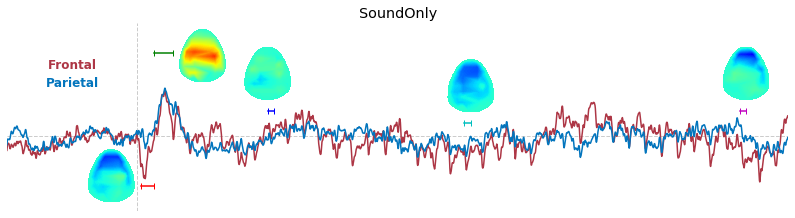

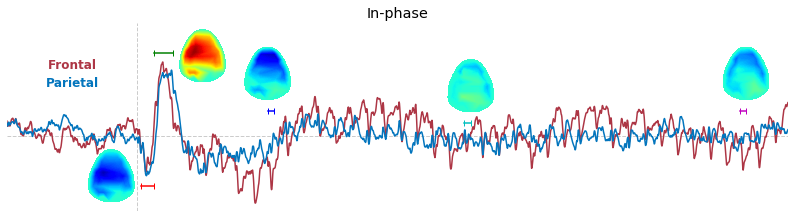

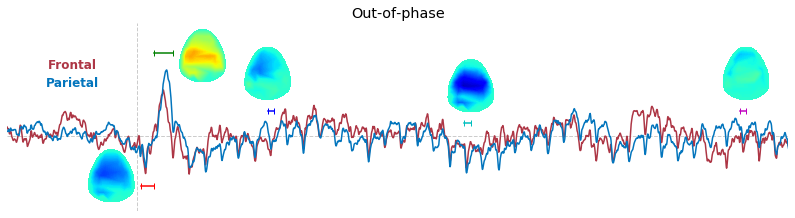

In [0]:
# Demo 3-2. Raw voltage topography
clim = [-20,30]
for targetCondition in conditions:
  trialIdx = np.where((EEG.events[:,2])==targetCondition)[0]

  # Calc ERP traces for visualization
  erp = np.mean(EEG.data[:,:,trialIdx],2)
  frontal_erp = np.mean(erp[2:5,:],0)     # Average of frontal-area channels
  parietal_erp = np.mean(erp[20:24,:],0)  # Average of parietal-area channels

  # Plot ERP trace
  plt.figure(figsize=(14,20))
  plt.subplot(len(conditions),1,np.where(np.array(conditions)==targetCondition)[0]+1)
  color_f = (.68,.210,.27) # Custom color value
  color_p = (.01,.457,.74)
  plt.grid('off')
  plt.plot((0,0),(-30,45), '--', linewidth = 1, color = (.8,.8,.8))
  plt.plot((-.2,1), (0,0), '--', linewidth = 1, color = (.8,.8,.8))
  plt.plot( EEG.times, frontal_erp,  color= color_f)
  plt.plot( EEG.times, parietal_erp, color= color_p)
  plt.xlabel('Time (msec)')
  plt.xlim((-.2,1))
  plt.ylim((-30,45))
  plt.axis('off')
  plt.gca().set_facecolor((1,1,1))
  plt.text( -.1, 27, 'Frontal', ha='center', weight='bold', fontsize=12, color=color_f )
  plt.text( -.1, 20,'Parietal', ha='center', weight='bold', fontsize=12, color=color_p )
  plt.title('%s'%condNames[targetCondition-1])
  
  # Calculate topography data 
  t_slice = [  (.005, .025), (.0250, .0550), (.200, .210),(.502, .512), (.925, .935)  ]  
  y_mark = [-20, 33, 10, 5, 10]
  colors = ['r','g','b','c','m'] # color marker
  topos = []
  for tIdx in range(len(t_slice)):
    x_start, x_end, y_pos = t_slice[tIdx][0], t_slice[tIdx][1], y_mark[tIdx]
    idx_start, idx_end = np.where(EEG.times==x_start)[0][0], np.where(EEG.times==x_end)[0][0]
    plt.plot( EEG.times[[idx_start,idx_end]], [y_pos, y_pos], colors[tIdx]+'|-')
    topo_in = np.mean( erp[:36,idx_start:idx_end],1 )
    # bad-channel replacement
    topo_in[bad_channels] = np.median( topo_in.flatten() ) 
    topos.append( plot_topo2d(topo_in, plot_opt = False)[2] ) # Save it for drawing

  # Draw topography on ERP trace
  topo_size = (.07, 21) # X, Y size of topo image
  topo_shift = [ (-.04, -16), (.10, 32), (.20, 25), (.512, 20), (.935, 25) ]
  topo_clim = np.linspace(clim[0],clim[1],200)
  for tIdx in range(len(t_slice)):
    topo_x = np.linspace(topo_shift[tIdx][0]-topo_size[0]*.5,topo_shift[tIdx][0]+topo_size[0]*.5,topos[tIdx].shape[0])
    topo_y = np.linspace(topo_shift[tIdx][1]-topo_size[1]*.5,topo_shift[tIdx][1]+topo_size[1]*.5,topos[tIdx].shape[1])
    plt.contourf( topo_x, topo_y, topos[tIdx], cmap=cm.jet, levels=topo_clim )
  plt.show()


###3-3. Band-limited power topography

Other than raw voltage, topography of band-limited power at stimulation frequency (40 Hz) can be drawn as well. In this example, stimulus-evoked 40 Hz power were estimated using <code>bandpower()</code> function.  

To demonstrate the effect of stimulation, stimulus-free periods (e.g., pre- and post-stimulus period) data are also obtained.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in less


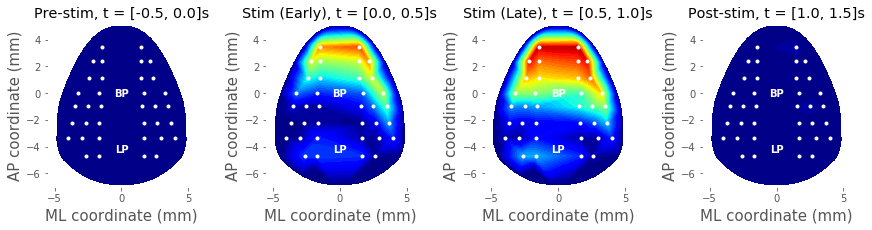

In [0]:
# Demo 3-3. Band-power topography: ERP response as a function of time and space
def band_power(x, targetBand, Fs=2000):
  if x.ndim==1:
    X, freq = fft_half(x,Fs)
    ind = np.where( (freq > targetBand[0]) & (freq <= targetBand[1]))
    power = np.sum( abs(X[ind])**2 )
  else:
    power = np.zeros( x.shape[0] )
    for ch in range(x.shape[0]):
      X,freq = fft_half(x[ch,],Fs)
      ind = np.where( (freq > targetBand[0]) & (freq <= targetBand[1]))
      power[ch]=np.sum( abs(X[ind])**2 )
  return power

targetCondition = 6 # = Auditory sound only
trialIdx = np.where((EEG.events[:,2])==targetCondition)[0]
erp = np.mean(EEG.data[:,:,trialIdx],2)
period = [ (-.5,0.), (0.,.5), (.5, 1.), (1.,1.5) ] # time in second
periodName = ['Pre-stim', 'Stim (Early)', 'Stim (Late)', 'Post-stim'];
freq = 40 # Hz
plt.figure(figsize=(15,3))
for periodIdx in range(len(period)):
  tIdx = (EEG.times>period[periodIdx][0]) & (EEG.times<=period[periodIdx][1])
  
  # Calculate power & Substitute bad-channel value
  power = band_power(erp[:36,tIdx], np.array([-2,2])+freq, EEG.info['sfreq'])
  power[bad_channels]= np.median(power.flatten())
  
  # Draw
  plt.subplot(1,len(period),periodIdx+1)
  plot_topo2d(power, clim=(0,3) )
  plt.title('%s, t = [%.1f, %.1f]s'%(periodName[periodIdx],period[periodIdx][0],period[periodIdx][1]))


### 3-4. Band-power topography: Comparison across various experimental conditions

Applying the same routine above, power topography figures of five different experimental conditions can be drawn as below.

In [0]:
# Demo 3-4. Band-power topography: Summary comparison across various stimulus conditions
freq = 40 # Hz
plt.figure(figsize=(17,4))
conditions = [6,4,1,3,2]
tIdx = (EEG.times>0) & (EEG.times<=1)
for targetCondition in conditions:
  trialIdx = np.where((EEG.events[:,2])==targetCondition)[0]
  erp = np.mean(EEG.data[:,:,trialIdx],2)
  
  # Calculate power & Substitute bad-channel value
  power = band_power(erp[:36,tIdx], np.array([-2,2])+freq, EEG.info['sfreq'])
  power[bad_channels]= np.median(power.flatten())
  
  # Draw
  plt.subplot(1,len(conditions),np.where(np.array(conditions)==targetCondition)[0]+1)
  plot_topo2d(power, clim=(0,7) )
  plt.title('%s'%condNames[targetCondition-1])
  if targetCondition is not conditions[0]: plt.ylabel('')


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: invalid value encountered in greater
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:120: RuntimeWarning: invalid value encountered in less


<br>
<br>
Enjoy!

In [0]:
# Try on your own!
